链接：https://www.zhihu.com/question/37894914/answer/199714413
来源：知乎

刚开始转行做计算机视觉嵌入式，被老板分配任务学习OpenVX，做了一周多了，来谈谈我自己的看法。不知道是不是因为OpenVX才刚发展起来没多久，感觉资料真是少之又少，例子少，连实现都很少。所以这里只从宏观上解释一下这两者的区别和联系吧。先简单说一下OpenVX到底是个什么东西吧。OpenVX标准其实就是个骨架而已，只有一些头文件声明了很多宏、枚举、变量类型、函数等等，而这些函数还不能用，因为只有声明没有实现。想要实现，就得有人写出cpp文件来，把头文件里的函数定义好了，这才能被开发者调用。为啥要定义这么个标准呢？其实是这样，大家知道各种硬件厂商生产的芯片结构功能差别很大，同样的c语言代码在不同硬件上实现起来性能也有很大差异，所以想要最大程度发挥硬件性能，必须针对硬件本身进行代码优化。这样，同样的算法，不同硬件优化以后的代码是不一样的，这就对开发者造成很大困扰，因为一旦要换平台实现某个功能，原来的代码就不能用了。为了解决这个问题，很多家硬件厂商（包括Intel、AMD、TI、Apple等等）就坐在一起商量，开能不能制定一个统一的标准，让开发者只关注在算法实现上面而不是硬件上的各种小问题。硬件本身肯定是生产硬件的厂家最熟悉，那么那些由于硬件设备不同导致的代码差异部分由厂家来实现就最好了，这样既能充分利用硬件本身，又能方便开发人员。这些大佬们坐在一起解决类似问题不是第一次了，早在本世纪初他们就成立了一个组织叫Khronos Group，专门搞这种跨平台标准，而且这些标准都是开源的，比较出名的OpenCL、OpenGL标准等等都是他们制定的。但注意，OpenCV并不是这个组织搞出来的，它是由Intel建立，后来由Willow Garage支持维护的开源计算机视觉库。好了，讲到这儿大伙儿应该明白OpenVX标准制定的目的了，说白了就是为了实现了跨平台加速处理。接下来说一下它的基本加速原理。其实呢，图像处理就是对图片矩阵数组进行一系列操作，然后从结果中找出我们想要的信息。每一次对图像的基本操作都可以看成整个流程中的一个节点（node），这个节点通过自己处理前和处理后的图像和其他节点相连，形成一个网络，我们这里叫graph。硬件开发商需要做的之一，就是想办法针对自己的硬件实现node的代码，使之符合OpenVX的标准且能在自己的硬件上得到优化。接下来，开发者就只需要把这些node连成graph，实现自己的功能。最后，开发商再针对自己的硬件对graph进行优化加速。如此一来，开发者的工作量就被大大削减了，可以缩短开发周期，提高代码可移植性。那么有人会问，如果厂家实现的这些node满足不了我的需要怎么办？这时OpenVX提供了一种自定义node的机制，它使得用户可以根据自己的需要编写node，并最终和graph相融合。自己写node就和之前的开发一样了，你可以选择利用OpenCV中的函数，也可以自己编写处理操作，还能通过OpenCL用GPU进行加速。但是不管怎样，都是放在OpenVX这个大框架中的。从上面可以看出，OpenVX和OpenCV并不冲突，他们可以说是互补的，OpenVX在嵌入式和实时性系统中可以更好地发挥它的优势，在某些场合配合OpenCV的强大功能可以实现更好的效果。





Khronos Group 官网：https://www.khronos.org/openvx/

Khronos Group是一个行业组织，创建开放标准以实现并行计算、图形、视觉、传感处理和动态媒体在各种平台和设备上的编写和加速。Khronos标准包括Vulkan, OpenGL, OpenGL ES, WebGL, OpenCL, SPIR, SYCL, WebCL, OpenVX, EGL, OpenMAX, OpenVG, OpenSL ES, StreamInput, COLLADA和glTF。

OpenSL：音频的硬件加速接口。

Vulkan：OpenGL的升级版本。在OpenGL中Context和单一线程是绑定的，所以所有需要作用于Context的操作，例如改变渲染状态，绑定Shader，调用Draw Call，都只能在单一线程上进行。Vulkan中不再需要依赖于绑定在某个线程上的Context，而是用全新的基于Queue的方式向GPU递交任务，并且提供多种Synchronization的组件让多线程编程更加亲民。

简单来说，Khronos的任务就是创建一个统一的硬件和软件之间的API，这样无论软件厂商，还是硬件厂商，都能各行其道，互不干扰了。

概述
官网：

https://www.khronos.org/openvx/

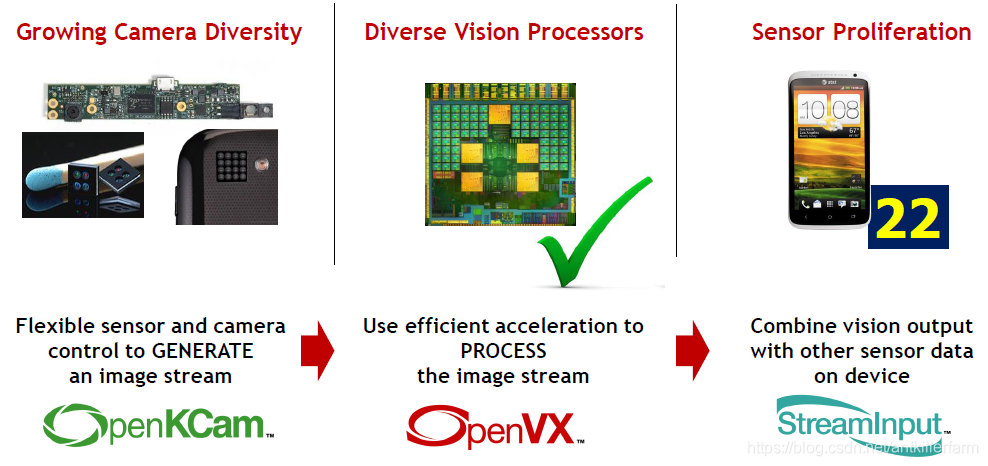

OpenVX本身也是一个系列标准。它包括：

OpenVX：一个传统的CV接口。提供包括直方图、Harris、Canny等特征算子的API。

OpenVX SC（Safety Critical）：安全版的OpenVX。

OpenVX NN Extension：专门用于提供NN加速方面的API。目前主要集中于CNN的加速，即卷积、池化等操作，对其他NN支持有限。此外，这些API主要用于预测，而非训练。

Khronos官方提供了一个OpenVX的软件参考实现，用于软硬件厂商的测试工作。

相关API文档和参考实现（sample code）参见：

https://www.khronos.org/registry/OpenVX/

Host & Device
和OpenGL类似，一般将CPU称作Host，而将GPU称作Device。App运行在Host上，而硬件加速由Device实现。

Device上的内存一般不能直接访问，需要使用vxCreateScalar、vxCreateTensor之类的API，将相关数据传到Device上。

类似的，有些API也分为Host版本和Device版本，前者用于Host和Device之间的数据交换，而后者用于Device内部数据的交换。

比如，vxCreateTensorAddressing和vxCreateTensorView，都是选择tensor的某一部分，前者是Host API，而后者是Device API。

数组的存储格式
和OpenGL一样，OpenVX中的tensor，也是列优先存储的。而C语言是行优先存储的。

行优先/列优先的概念参见：

http://blog.csdn.net/zhoxier/article/details/8058176

数组按行/列存储

OpenCL
官网：

https://www.khronos.org/opencl/

按照Michael J. Flynn的分类方法，计算机的体系结构可分为如下四类：

Single instruction stream single data stream (SISD)

Single instruction stream, multiple data streams (SIMD)

Multiple instruction streams, single data stream (MISD)

Multiple instruction streams, multiple data streams (MIMD)

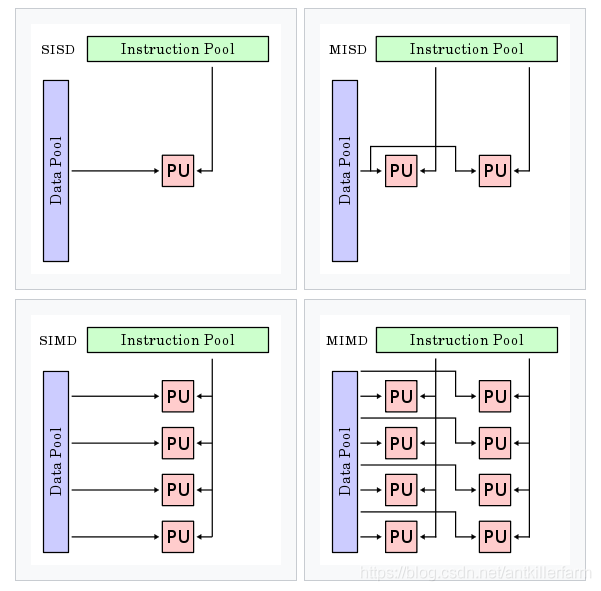

原图地址：

https://en.wikipedia.org/wiki/Flynn's_taxonomy

CPU通常是SISD和SIMD的，而GPU则是MISD的，超级计算机则是MIMD的。

OpenCL是一个硬件中立标准，原则上和计算机的体系结构无关。当然现实中，我们主要使用GPU进行运算加速。

和OpenGL、OpenVX的专用性不同，OpenCL主要定位于通用数学运算。OpenGL年代久远也就罢了。对于像OpenVX这样的新标准，有的时候其内部实现也有可能依赖于OpenCL。毕竟无论哪个领域的专用计算，最终都可以分解为基本的数学运算。

简单来说，OpenVX的封装粒度在层一级，而OpenCL最多只提供到矩阵运算一级的API。

术语：

Shared Virtual Memory，SVM

Memory consistency model

Multisample anti-aliasing，MSAA

参考：

http://blog.csdn.net/leonwei/article/details/8880012

从零开始学习OpenCL开发（一）架构

SYCL
SYCL是Khronos提供的基于OpenCL的C++接口层。

官网：

https://www.khronos.org/sycl

ComputeCpp
ComputeCpp是Codeplay公司提供的SYCL接口的实现。它除了支持OpenCL之外，还支持CUDA和C++AMP。

官网：

https://www.codeplay.com/products/computesuite/computecpp

OpenVG
OpenVG是针对诸如Flash和SVG的矢量图形算法库提供底层硬件加速界面的免授权费、跨平台应用程序接口API。

官网：

https://www.khronos.org/openvg/

OpenVG和OpenGL 3D的差异：

1.OpenVG能实现的功能，OpenGL 3D都能实现，后者的功能要强大的多。

2.OpenGL 3D的基本图元是三角形，而OpenVG的基本图元是Path，也就是闭合曲线。通常来说，Path的顶点要远少于三角形。例如，绘制一个圆形，要用很多三角形拟合，但使用Path的话，用3段Bézier curve就可以表示了。

3.OpenVG支持物体任意缩放而不失真，而OpenGL 3D中的物体在大分辨率下会有锯齿。

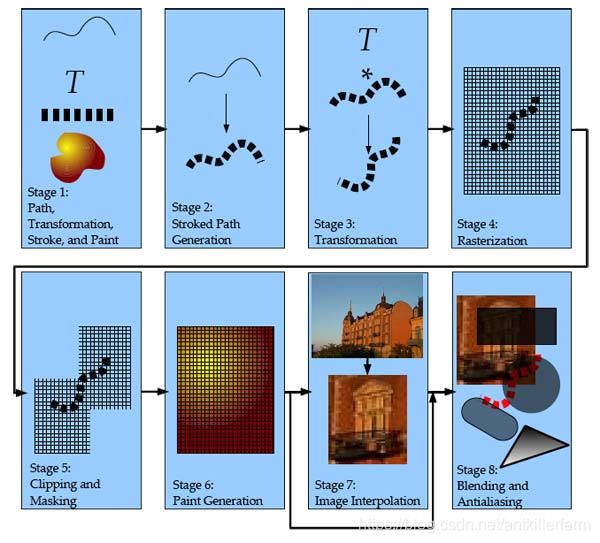

上图是OpenVG的pipeline。

运算加速库
MKL
Intel Math Kernel Library是一套经过高度优化和广泛线程化的数学例程，专为需要极致性能的科学、工程及金融等领域的应用而设计。

官网：

https://software.intel.com/zh-cn/mkl

Neon
Neon是个大路货的名字，在数值计算领域ARM和Intel都有叫Neon的硬件或技术。

ARM的Neon是适用于ARM Cortex-A系列处理器的一种128位SIMD扩展结构。它主要聚焦于矩阵运算，当然也可用于DL领域。

官网：

https://developer.arm.com/technologies/neon

Intel的Neon专为DL设计。

官网：

https://ai.intel.com/neon/

OpenACC
官网：

https://www.openacc.org/

PGI
PGI是由The Portland Group开发的并行计算库，但后者已于2013年被NVIDIA收购。

官网：

https://www.pgroup.com/

HSA
HSA (Heterogeneous System Architecture)是AMD推出的异构系统架构。

官网：

http://www.amd.com/zh-cn/innovations/software-technologies/hsa

NetLib
NetLib是一个数学方面的网站，收集了大量的数学软件和论文。官网：

http://www.netlib.org/

知名软件LAPACK（Linear Algebra PACKage）和BLAS (Basic Linear Algebra Subprograms)的官网就在NetLib：

http://www.netlib.org/lapack/index.html

http://www.netlib.org/blas/index.html

LAPACK和BLAS的历史非常悠久，是用Fortran语言编写的。

常用线性代数库
ATLAS（Automatically Tuned Linear Algebra Soft）
代码：

https://sourceforge.net/projects/math-atlas/

安装：

sudo apt-get install libatlas-base-dev

OpenBLAS
官网：

http://www.openblas.net/

代码：

https://github.com/xianyi/OpenBLAS

OpenBLAS需要gfortran参与编译：

sudo apt install gfortran

需要注意gcc的版本和gfortran的版本必须一致。例如，某台机器为了项目需要，没有使用ubuntu默认的gcc版本，这样即使安装了gfortran，也还是不行。最后，安装匹配的gfortran才解决了该问题。

NVIDIA
NVIDIA作为行业龙头，其影响力甚至在Khronos Group之上，它提出的标准很多成为了行业的事实标准。

最近（2018.2），公司副总M给我们讲座的时候，回顾他早年在NVIDIA的经历，当时他曾拥有数万股NV的股票，可惜早都卖了。这十几年来，NV股票经过5次分拆，当初的一股现在要值6500美元。他要不卖，现在可能已经是亿万富翁了。。。

术语
iGPU：Integrated Graphics Processing Unit。

dGPU：Discrete Graphics Processing Unit。

CUDA
CUDA是NVIDIA最早推出的通用数学运算库。除了基本的数学运算之外，还提供了一些工具包：

cuBLAS：线性计算库。

NVBLAS：多GPU版的cuBLAS。

cuFFT：FFT计算库。

nvGRAPH：图计算库。（这里的图是数学图论中的图，和DL框架中的计算图是两回事。）

cuRAND：随机数生成库。

cuSPARSE；稀疏矩阵计算库。

cuSOLVER：解线性方程的计算库。包括解稠密方程的cuSolverDN、解稀疏方程的cuSolverSP和矩阵分解的cuSolverRF。

Deep Learning SDK
cuDNN：DL计算库。

NCCL：多结点、多GPU的通信库。

TensorRT：嵌入式设备上专用于DL inference的计算库。

NVIDIA DIGITS：一款web应用工具，可在网页上对Caffe进行图形化操作和可视化。

参考：

https://mp.weixin.qq.com/s/v8-JHd5tWm41WLqR-h6eKA

使用TensorRT集成加速TensorFlow推理

NVDLA
NVIDIA Deep Learning Accelerator是一个开源的用于inference的芯片方案。官网：

http://nvdla.org/

NVIDIA DALI
NVIDIA DALI是一个GPU加速的数据增强和图像加载库，为优化深度学习框架数据pipeline而设计，而其中的NVIDIA nvJPEG是用于JPEG解码的高性能GPU加速库。

代码：

https://github.com/NVIDIA/dali

Tensor Core
https://mp.weixin.qq.com/s/pPjPLqgXZ8iCPS42vXJpuQ

NVIDIA Tensor Core深度学习核心解析

CUDA实战
安装：

http://docs.nvidia.com/cuda/cuda-installation-guide-linux/index.html

参考：

http://ishare.iask.sina.com.cn/f/17211495.html

深入浅出谈CUDA技术

http://peghoty.blog.163.com/blog/static/493464092013016113254852/

CUDA编程入门

http://blog.csdn.net/xsc_c/article/category/2186063

某人的并行计算专栏

http://tieba.baidu.com/p/2155772860

GPU和Shader技术的基础知识

http://www.cnblogs.com/geniusalex/archive/2008/12/26/1941766.html

CPU GPU设计工作原理

http://www.jianshu.com/p/8687a040eb48

GPU处理图像Shader的入门

https://mp.weixin.qq.com/s/bvNnzkOzGYYYewc3G9DOIw

GPU是如何优化运行机器学习算法的？

https://mp.weixin.qq.com/s/nAwxtOUi6HpIjVOREgEfaA

CUDA编程入门极简教程

https://mp.weixin.qq.com/s/-zdIWkuRZXhsLJmOZljOBw

CUDA编程精品教材分享《基于GPU-多核-集群等并行化编程》

CATIA
CATIA是法国达索公司的产品开发旗舰解决方案。作为PLM协同解决方案的一个重要组成部分，它可以通过建模帮助制造厂商设计他们未来的产品，并支持从项目前阶段、具体的设计、分析、模拟、组装到维护在内的全部工业设计流程。CATIA是GPU在工业上的一个重要的应用案例。

官网：

https://www.3ds.com/products-services/catia/

MLPerf
MLPerf是谷歌、百度、斯坦福等联手打造的基准测量工具，用于测量机器学习软件与硬件的执行速度。

它的到来代表着原本市场规模较为有限的AI性能比较方案正式踏上发展正轨。简而言之就是：以后各大公司发布的AI性能对比不能再王婆卖瓜自卖自夸了。

官网：

https://mlperf.org/

RDMA
RDMA网卡（Remote Direct Memory Access，这是一种硬件的网络技术，它使得计算机访问远程的内存时无需远程机器上CPU的干预）已经可以提供50~100Gbps的网络带宽和微秒级的传输延迟。

目前许多以深度学习为目标应用的GPU机群都部署了这样的网络。

参考：

https://mp.weixin.qq.com/s/_xcE8RUs0m4gwk3kxpe9jA

基于HTM/RDMA的可扩展内存事务处理系统

参考：https://blog.csdn.net/antkillerfarm/article/details/83986764